<h1>SQL, Pınar Yazgan<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1--Querying-SQL-databases" data-toc-modified-id="1--Querying-SQL databases-1">1-Querying SQL databases</a></span></li><li><span><a href="#2--Setup-Environment" data-toc-modified-id="2--Setup-Environment-2">2-Setup Environment</a></span></li><li><span><a href="#3--Simple-Queries" data-toc-modified-id="3--Simple-Queries-3">3-Simple Queries</a></span><li><span><a href="#4--Simple-Joins" data-toc-modified-id="4--Simple-Joins-4">4-Simple Joins</a></span><li><span><a href="#5--Simple-Aggregation" data-toc-modified-id="5--Simple-Aggregation-5">5-Simple Aggregation</a></span></li><li><span><a href="#6--More-complex-queries-with-set-operations-and-common-table-expressions" data-toc-modified-id="6--More-complex-queries-with-set-operations-and-common-table-expressions-6">6-More complex queries with set operations and common table expressions</a></span></li><li><span><a href="#--7-Visualize-Data" data-toc-modified-id="7--Visualize-Data-7">7-Visualize Data</a></span></li><li><span><a href="#--8-A-rather-complex-example" data-toc-modified-id="8--A-rather-complex-example-8">8-A rather complex example</a></span></li></ul></div>

# 1- Querying SQL Databases
Your task is to analyze game and player statistics from the NBA 2008-2009 season provided as a relational database of play-by-play data.

You can use jupyter to execute the queries. To write and test the queries, use the web interface at http://pollux.vo.elte.hu/basketball/. Copy queries into the worksheet for submission.

You can compare your results with https://en.wikipedia.org/wiki/2008%E2%80%9309_NBA_season

# 2- Setup Environment

In [24]:
! pip install --user pymssql
%matplotlib inline
from matplotlib import pyplot as plt

In [25]:
import pymssql

In [26]:
# This opens a connection to the MS SQL server
conn = pymssql.connect(server='kooplex-temp.elte.hu',
                       port=1433,
                       user='basketball_user', 
                       password='sayhaTU56#@dfsS',
                       database='Basketball')

# This closes it 
# conn.close()

In [27]:
# We need a cursor that contains the state of our query(s)
cursor = conn.cursor()

In [28]:
#A test query
res = cursor.execute('select * from shot;')
print(cursor.fetchone())

(1, 2, 18, 'LAL', 208, None, None, 23, 13)


# 3- Simple Queries

a) List all teams playing in the league during the season

b) List teams in alphabetic order but division by division

c) Count the number of persons/players in the league

In [29]:
# a) List all teams playing in the league during the season

In [30]:
import pandas as pd
import pandas.io.sql as sqlio
sql = "SELECT name FROM team;"
dat = sqlio.read_sql_query(sql, conn)
dat.head(100)
#I saw 30 teams

,name
0,Atlanta Hawks
1,Boston Celtics
2,Charlotte Bobcats
3,Chicago Bulls
4,Cleveland Cavaliers
5,Dallas Mavericks
6,Denver Nuggets
7,Detroit Pistons
8,Golden State Warriors
9,Houston Rockets


In [31]:
#b) List teams in alphabetic order but division by division
sql="select division_id,name from team order by name;"
dat = sqlio.read_sql_query(sql, conn)
dat.head(100)
# I saw 30 teams and listed with division_id

,division_id,name
0,SE,Atlanta Hawks
1,AT,Boston Celtics
2,SE,Charlotte Bobcats
3,CE,Chicago Bulls
4,CE,Cleveland Cavaliers
5,SW,Dallas Mavericks
6,NW,Denver Nuggets
7,CE,Detroit Pistons
8,PA,Golden State Warriors
9,SW,Houston Rockets


In [32]:
#c) Count the number of persons/players in the league
sql="select count(person_id) from player;"
dat = sqlio.read_sql_query(sql, conn)
dat.head()
# ı saw 515 players in the league

,
0,515



# 4- Simple Joins

a) List teams by division, including the division name

b) List players by team including the uniform number

In [33]:
# a) List teams by division, including the division name
sql="""select d.name as division_name, t.name as team_name from team t 
inner join division d on d.id=t.division_id order by division_name""";
dat = sqlio.read_sql_query(sql, conn)
dat.head(100)
# I saw 30 teams and ordered by division name

,division_name,team_name
0,Atlantic Division,Boston Celtics
1,Atlantic Division,New Jersey Nets
2,Atlantic Division,New York Knicks
3,Atlantic Division,Philadelphia 76ers
4,Atlantic Division,Toronto Raptors
5,Central Division,Chicago Bulls
6,Central Division,Cleveland Cavaliers
7,Central Division,Detroit Pistons
8,Central Division,Indiana Pacers
9,Central Division,Milwaukee Bucks


In [34]:
#b) List players by team including the uniform number
sql="""select p.name as player_name,pl.number, t.name as team_name from person p 
inner join player pl on pl.person_id=p.id inner join team t on pl.team_id=t.id""";
dat = sqlio.read_sql_query(sql, conn)
dat.head(1000)
# I saw 515 players in teams. 

,player_name,number,team_name
0,Maurice Evans,1,Atlanta Hawks
1,Mike Bibby,10,Atlanta Hawks
2,Speedy Claxton,12,Atlanta Hawks
3,Al Horford,15,Atlanta Hawks
4,Joe Johnson,2,Atlanta Hawks
...,...,...,...
510,Antawn Jamison,4,Washington Wizards
511,Dominic McGuire,5,Washington Wizards
512,Antonio Daniels,6,Washington Wizards
513,Javaris Crittenton,8,Washington Wizards


# 5- Simple Aggregation

a) Count number of persons playing for a given team

b) List all teams along with the number of players

c) Count the number of teams a given person played for

d) List all players along with the number of teams they played for

e) List players who played for more than two teams during the season

In [35]:
# a) Count number of persons playing for a given team
# I prefered  t.name='Atlanta Hawks' as a given team. Then I counted number of players in team.
# queries
sql="""select t.name as team_name,count(p.id) as count_player from player p inner join team t on p.team_id=t.id
where t.name='Atlanta Hawks' group by t.name"""
dat = sqlio.read_sql_query(sql, conn)
dat.head(100)
#I saw that 15 players played in Atlanta Hawks

,team_name,count_player
0,Atlanta Hawks,15


In [36]:
#b) List all teams along with the number of players
sql="select t.name as team_name,count(p.id) as count_player from player p inner join team t on p.team_id=t.id group by t.name;"
dat = sqlio.read_sql_query(sql, conn)
dat.head(100)
# I saw that 30 teams and listed teams name and count of players of teams.

,team_name,count_player
0,Atlanta Hawks,15
1,Boston Celtics,16
2,Charlotte Bobcats,24
3,Chicago Bulls,19
4,Cleveland Cavaliers,16
5,Dallas Mavericks,16
6,Denver Nuggets,17
7,Detroit Pistons,15
8,Golden State Warriors,17
9,Houston Rockets,17


In [37]:
#c) Count the number of teams a given person played for
sql="""select p.name as player_name, count(t.name) as count_team from person p inner join player pl on pl.person_id=p.id 
inner join team t on pl.team_id=t.id where p.name='Adonal Foyle' group by p.name"""
dat = sqlio.read_sql_query(sql, conn)
dat.head(100)
# As an example I selected Adonal Foyle and listed name and count of his team. I saw that He played in 2 teams

,player_name,count_team
0,Adonal Foyle,2


In [38]:
#d) List all players along with the number of teams they played for
sql="""select p.name as player_name, count(t.name) as count_team from person p inner join player pl on pl.person_id=p.id
inner join team t on pl.team_id=t.id group by p.name"""
dat = sqlio.read_sql_query(sql, conn)
dat.head(1000)
# I saw 444 players and I listed player_name and count of teams they played

,player_name,count_team
0,Aaron Brooks,1
1,Aaron Gray,1
2,Acie Law,1
3,Adam Morrison,2
4,Adonal Foyle,2
...,...,...
439,Yao Ming,1
440,Yi Jianlian,1
441,Zach Randolph,2
442,Zaza Pachulia,1


In [39]:
#e) List players who played for more than two teams during the season
sql="""select p.name as player_name, count(t.name) as count_team from person p inner join player pl on pl.person_id=p.id
inner join team t on pl.team_id=t.id group by p.name having count(t.name)>2"""
dat = sqlio.read_sql_query(sql, conn)
dat.head(100)
# I listed who played for more than 2 teams  using having count(t.name)>2 
# I saw that 3 players Cheikh Samb,Drew Gooden,Tim Thomas played more than 2 teams.

,player_name,count_team
0,Cheikh Samb,3
1,Drew Gooden,3
2,Tim Thomas,3


# 6 - More complex queries with set operations and common table expressions

a) Pick a game and list all field shots and free throw attempts, including points

b) Combine the previous two into a single table and only show successful attempts

c) Take previous query and sum all points by team so that end result is available

d) Remove filter on game and get end result of each game during season

e) Modify the previous query to return a single line per game, with home team and away team points

In [40]:
#a) Pick a game and list all field shots and free throw attempts, including points
sql="""select point.game_id,team.name as team_name,sum(point.points) as sum_of_points_free_throws from freethrow
     inner join team  on freethrow.team_id=team.id inner join point on freethrow.cntr=point.cntr 
     where freethrow.game_id=1 and point.game_id=1 group by point.game_id,team.name"""
dat = sqlio.read_sql_query(sql, conn)
dat.head(100)
# Selected game_id=1 and  listed game_id, team_name,sum of free throw attempts of teams 

,game_id,team_name,sum_of_points_free_throws
0,1,Los Angeles Lakers,15
1,1,Portland Trail Blazers,8


In [41]:
#a) Pick a game and list all field shots and free throw attempts, including points
sql="""select point.game_id,team.name as team_name,sum(point.points) as sum_of_points_field_shots from shot inner join team 
     on shot.team_id=team.id inner join point on shot.cntr=point.cntr where shot.game_id=1 
     and point.game_id=1 group by point.game_id,team.name"""
dat = sqlio.read_sql_query(sql, conn)
dat.head(100)
## Selected game_id=1 and listed game_id, team_name,sum of field shots of teams

,game_id,team_name,sum_of_points_field_shots
0,1,Los Angeles Lakers,81
1,1,Portland Trail Blazers,68


In [42]:
#b) Combine the previous two into a single table and only show successful attempts
sql="""select point.game_id,team.name as team_name,sum(point.points) as sum_of_points from shot 
     inner join team  on shot.team_id=team.id inner join point on shot.cntr=point.cntr 
     where shot.game_id=1 and point.game_id=1 group by point.game_id,team.name 
     union select point.game_id,team.name as team_name,sum(point.points) as sum_of_points_free_throws
     from freethrow inner join team  on freethrow.team_id=team.id 
     inner join point on freethrow.cntr=point.cntr where freethrow.game_id=1 
     and point.game_id=1 group by point.game_id,team.name"""
dat = sqlio.read_sql_query(sql, conn)
dat.head(100)
# Combined previous two tables into a single table.

,game_id,team_name,sum_of_points
0,1,Los Angeles Lakers,15
1,1,Los Angeles Lakers,81
2,1,Portland Trail Blazers,8
3,1,Portland Trail Blazers,68


In [43]:
#c) Take previous query and sum all points by team so that end result is available
sql="""select game_id,team_name,sum(points) from (select point.game_id as game_id,team.name as team_name,sum(point.points)
     as points from shot inner join team  on shot.team_id=team.id inner join point on shot.cntr=point.cntr 
     where shot.game_id=1 and point.game_id=1 group by point.game_id,team.name 
     union select point.game_id,team.name as team_name,sum(point.points) as points from freethrow 
     inner join team  on freethrow.team_id=team.id inner join point on freethrow.cntr=point.cntr 
     where freethrow.game_id=1 and point.game_id=1 group by point.game_id,team.name)abc group by game_id,team_name"""
dat = sqlio.read_sql_query(sql, conn)
dat.head(100)
# Took previous query and sum all points by team.

,game_id,team_name,
0,1,Los Angeles Lakers,96
1,1,Portland Trail Blazers,76


In [44]:
#d) Remove filter on game and get end result of each game during season

sql="""select game_id,team_name,sum(points) as totalpoint
     from (select point.game_id as game_id,team.name as team_name,sum(point.points) as points 
           from shot inner join team  on shot.team_id=team.id inner join point on shot.cntr=point.cntr
           where shot.game_id=point.game_id group by point.game_id,team.name 
           union select point.game_id,team.name as team_name,sum(point.points) as points from freethrow 
           inner join team  on freethrow.team_id=team.id inner join point on freethrow.cntr=point.cntr 
           where freethrow.game_id=point.game_id group by point.game_id,team.name)abc 
     group by game_id,team_name order by game_id"""
dat = sqlio.read_sql_query(sql, conn)
dat.head(1000)
# I removed filter on game (game_id=1) and listed all game-id , team_name, and teams' total points.

,game_id,team_name,totalpoint
0,1,Portland Trail Blazers,76
1,1,Los Angeles Lakers,96
2,2,Chicago Bulls,108
3,2,Milwaukee Bucks,95
4,3,Boston Celtics,90
...,...,...,...
995,498,Detroit Pistons,93
996,499,Dallas Mavericks,100
997,499,Phoenix Suns,128
998,500,Houston Rockets,98


In [45]:
#e) Modify the previous query to return a single line per game, with home team and away team points--join
sql="""select home.game_id,home_team_name,home_team_points,away_team_name,away_team_points 
from (select game_id,team_name as home_team_name,sum(points) as home_team_points 
from (select point.game_id as game_id,team.name as team_name,sum(point.points) as points
from shot inner join team  on shot.team_id=team.id inner join game on shot.game_id=game.id 
inner join point on shot.cntr=point.cntr where shot.game_id=point.game_id and shot.team_id=home_team_id 
group by point.game_id,team.name union select point.game_id,team.name as team_name,sum(point.points) as points
from freethrow inner join team  on freethrow.team_id=team.id inner join game on freethrow.game_id=game.id 
inner join point on freethrow.cntr=point.cntr where freethrow.game_id=point.game_id 
and freethrow.team_id=game.home_team_id group by point.game_id,team.name)abc group by game_id,team_name)
as home inner join (select game_id,team_name as away_team_name,sum(points) as away_team_points
from (select point.game_id as game_id,team.name as team_name,sum(point.points) as points 
from shot inner join team  on shot.team_id=team.id inner join game on shot.game_id=game.id 
inner join point on shot.cntr=point.cntr where shot.game_id=point.game_id and shot.team_id=away_team_id 
group by point.game_id,team.name union select point.game_id, team.name as team_name,sum(point.points) as points
from freethrow inner join team  on freethrow.team_id=team.id inner join game on freethrow.game_id=game.id
inner join point on freethrow.cntr=point.cntr where freethrow.game_id=point.game_id and
freethrow.team_id=game.away_team_id group by point.game_id,team.name)abc group by game_id,team_name) 
as away on away.game_id=home.game_id order by away.game_id"""
dat = sqlio.read_sql_query(sql, conn)
dat.head(100000)
#I modified previous query and returned game_id, home_team_name, home_team_points, away_team_name,away_team_points
#first table for game_id,home_team_name,home_team_points, second table for game_id,away_team_name,away_team_points
#I joined these tables using inner join and away.game_id=home.game_id
#I saw 1176 games

,game_id,home_team_name,home_team_points,away_team_name,away_team_points
0,1,Los Angeles Lakers,96,Portland Trail Blazers,76
1,2,Chicago Bulls,108,Milwaukee Bucks,95
2,3,Boston Celtics,90,Cleveland Cavaliers,85
3,4,Houston Rockets,82,Memphis Grizzlies,71
4,5,Golden State Warriors,103,New Orleans Hornets,108
...,...,...,...,...,...
1171,1172,Dallas Mavericks,95,Houston Rockets,84
1172,1173,Minnesota Timberwolves,90,Sacramento Kings,97
1173,1174,Los Angeles Clippers,85,Oklahoma City Thunder,126
1174,1175,Memphis Grizzlies,98,Atlanta Hawks,90


## 7 - Visualize Data

Choose one from the following and visualize it!

a) Show the "hottest" positions on the floor where the players scored most! (Create a 2d histogram of the field)

b) What properties of a player are the most correlated with their scoring/assisting/rebound performance? Select some properties and create an interactive visualization for it, that shows the relation between these terms!

c) Create pie charts on the US map that shows for each teams' geolocation their average received/scored point ratio!

Don't forget to comment on the data sources (tables) you used and the method how you obtained the values!

Text(0.5, 1.0, 'Point weighed histogram of the player positions')

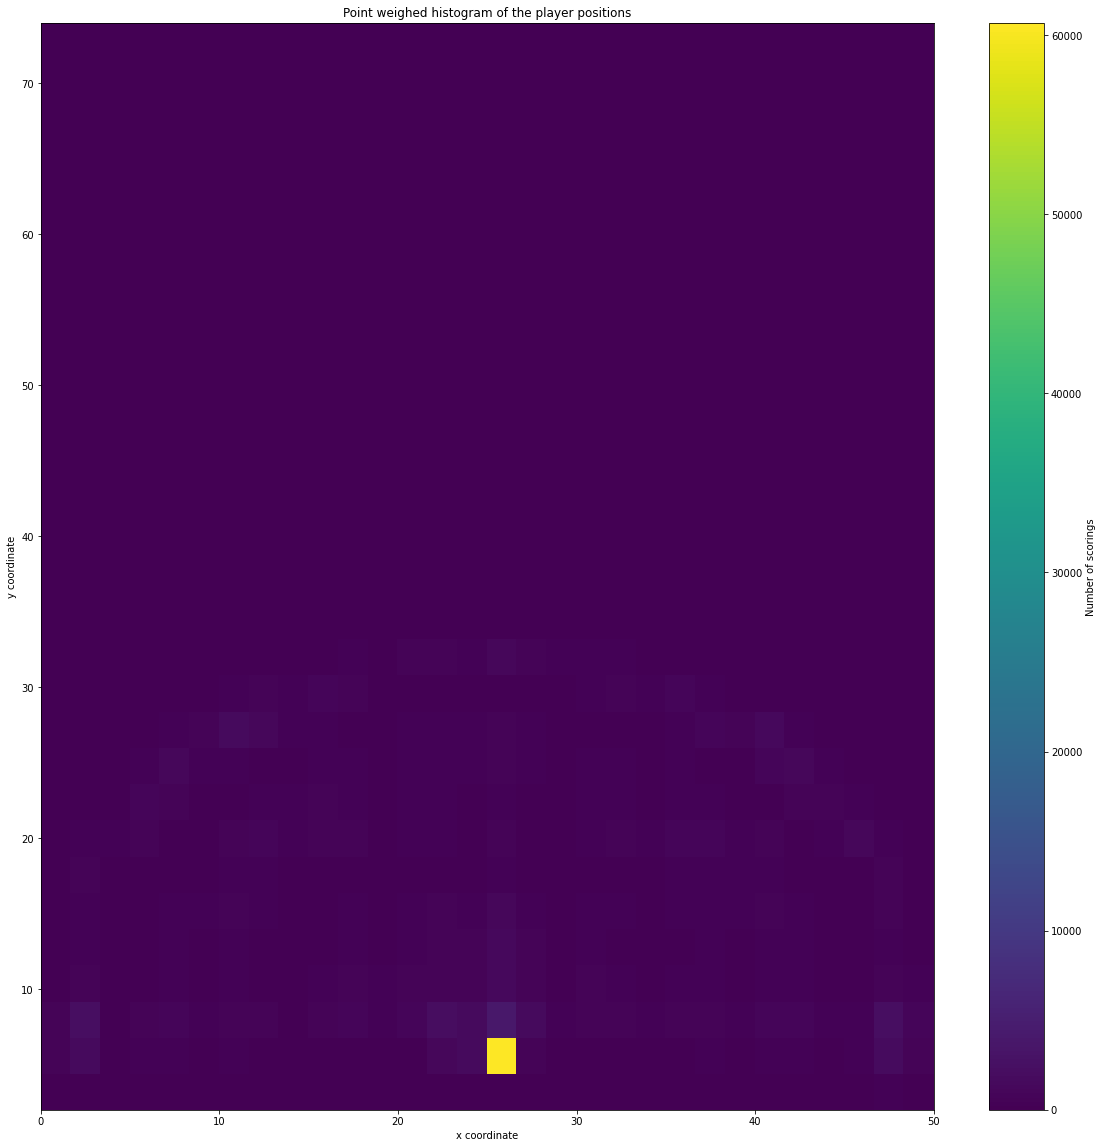

In [46]:
#a) Show the "hottest" positions on the floor where the players scored most! (Create a 2d histogram of the field)

#Firstly I joined the shot table with the point table WHERE shot.game_id = point.game_id and  point.cntr = shot.cntr
#Then obtained the points for the succesful field shots.
#I found coordinate columns( x and y ) of the positions from shot table where the player threw the ball for a field shot 
#and corresping point values and deleted NULL or nan values of x and y.
#I used the points as weights in the histogram.
dat = sqlio.read_sql_query(sql, conn)

sql="""SELECT * FROM shot INNER JOIN point ON point.cntr = shot.cntr WHERE shot.game_id = point.game_id 
     AND shot.x IS NOT NULL AND shot.y IS NOT NULL"""
scoredata = sqlio.read_sql_query(sql, conn)
xCoord = pd.to_numeric(scoredata['x'],errors="coerce")
yCoord = pd.to_numeric(scoredata['y'],errors="coerce")
pointWeights = pd.to_numeric(scoredata['points'],errors="coerce")
fig, ax = plt.subplots(figsize=(20, 20))
cs = ax.hist2d(xCoord,yCoord,bins=30,weights=pointWeights,cmap="viridis")[3]
cbar = fig.colorbar(cs,label="Number of scorings")
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
ax.set_title("Point weighed histogram of the player positions")


## 8 (optional) - a rather complex example

a)  Print season results by division. For each team, calculate with a **single_ query**

- number of games played
- wins
- losts
- winning percentage

Compare with https://en.wikipedia.org/wiki/2008–09_NBA_season#By_division